# Exploratory Data Analysis For Credit Card Data

Business Problem:


In order to effectively produce quality decisions in the modern credit card industry, knowledge must be gained through effective data analysis and modelling. Through the use of dynamic data-driven decision-making tools and procedures, information can be gathered to successfully evaluate all aspects of credit card operations. PSPD Bank has banking operations in more than 50 countries across the globe. Mr. Jim Watson, CEO, wants to evaluate areas of bankruptcy, fraud and collections, respond to customer requests for help with proactive offers and services.

Following are some of Mr. Watson's questionsn to understand the customer spend and repayment behaviour

In [1]:
#Import necessary libraries¶

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [2]:
customer = pd.read_csv("Customer Acqusition.csv",usecols=["Customer","Age","City","Product","Limit","Company","Segment"])
repay = pd.read_csv("Repayment.csv",usecols = ["Customer","Month","Amount"])
spend = pd.read_csv("spend.csv",usecols=["Customer","Month","Type","Amount"])

Here a we have 3 different files for credit card analysis i.e. Customer, Repayment & Spend and these are store in 3 different variables

In [3]:
customer.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
repay.head()

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02
2,A1,15-Jan-04,259490.06
3,A1,25-Jan-04,437555.12
4,A1,17-Jan-05,165972.88


In [5]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [6]:
print(customer.shape)
print(repay.shape)
print(spend.shape)

(100, 7)
(1523, 3)
(1500, 4)


in this datasets,

Customer has 100 Rows & 7 Columns

repay has 1523 Rows & 3 Columns

spend has 1500 Rows & 4 Columns

In [7]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  100 non-null    object 
 1   Age       100 non-null    int64  
 2   City      100 non-null    object 
 3   Product   100 non-null    object 
 4   Limit     100 non-null    float64
 5   Company   100 non-null    object 
 6   Segment   100 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [8]:
repay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523 entries, 0 to 1522
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Amount    1500 non-null   float64
dtypes: float64(1), object(2)
memory usage: 35.8+ KB


In [9]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Customer  1500 non-null   object 
 1   Month     1500 non-null   object 
 2   Type      1500 non-null   object 
 3   Amount    1500 non-null   float64
dtypes: float64(1), object(3)
memory usage: 47.0+ KB


# Finding Null values in our Datasets

In [10]:
customer.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

This dataset doesn't have Null values

In [11]:
repay.isnull().sum()

Customer    23
Month       23
Amount      23
dtype: int64

This dataset has Null values

In [12]:
spend.isnull().sum()

Customer    0
Month       0
Type        0
Amount      0
dtype: int64

This dataset doesn't have Null values

In [13]:
# dropping null values present in 'repay' data set

repay.dropna(inplace=True)

In [19]:
repay.isnull().sum()

Customer    0
Month       0
Amount      0
dtype: int64

**(A) In case age is less than 18, replace it with mean of age values from Customer dataset**

In [26]:
customer.sort_values(by= 'Age')

,Customer,Age,City,Product,Limit,Company,Segment
67,A68,12,TRIVANDRUM,Silver,100000.0,C30,Self Employed
40,A41,13,COCHIN,Platimum,500000.0,C23,Govt
62,A63,15,BANGALORE,Gold,500000.0,C25,Self Employed
89,A90,16,COCHIN,Gold,500000.0,C13,Govt
13,A14,16,BANGALORE,Gold,500000.0,C14,Salaried_Pvt
...,...,...,...,...,...,...,...
63,A64,77,DELHI,Gold,500000.0,C26,Salaried_MNC
91,A92,78,BANGALORE,Gold,500000.0,C15,Govt
38,A39,78,TRIVANDRUM,Platimum,500000.0,C21,Salaried_MNC
16,A17,78,BOMBAY,Gold,500000.0,C17,Self Employed


In [27]:
mean_original = customer["Age"].mean()

In [28]:
print("The mean of Age column is",mean_original)

The mean of Age column is 46.49


As we are all know , Credid card has issue only for those person who has completed their Age 18+, so that's why it is important to find if datasets contain customer's whose age is less than 18.

In [29]:
#replacing age less than 18 with mean of age values

customer.loc[customer["Age"] < 18,"Age"] = customer["Age"].mean()

In [30]:
mean_new = customer["Age"].mean()

In [31]:
print("The mean of Age column is",mean_new)

The mean of Age column is 48.39940000000001


From this , we can observed 

Original mean has value = 46.49

and after replacing mean value to age who is having less than 18, then new mean we got is

New Mean = 48.399.

Which means that , we had Age value less than 18 in our dataset.

In [32]:
customer.loc[customer["Age"] < 18,"Age"]

Series([], Name: Age, dtype: float64)

In [33]:
print("All the customers who have age less than 18 have been replaced by mean of the age column.")

All the customers who have age less than 18 have been replaced by mean of the age column.


In [34]:
customer.head()

,Customer,Age,City,Product,Limit,Company,Segment
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [35]:
spend.head()

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13
2,A1,15-Jan-04,CLOTHES,23740.46
3,A1,25-Jan-04,FOOD,484342.47
4,A1,17-Jan-05,CAMERA,369694.07


In [36]:
# Merging customer and spend table on the basis of "Customer" column

customer_spend = pd.merge(left=customer,right=spend,on="Customer",how="inner")

In [37]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [38]:
customer_spend.shape

(1500, 10)

In [39]:
customer_spend.isnull().sum()

Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
Month       0
Type        0
Amount      0
dtype: int64

In [40]:
# All the customers whose spend amount is more than the limit,replacing with 50% of that customer’s limit

customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
18,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Jan-04,RENTAL,199554.72
19,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,28-Feb-05,TRAIN TICKET,376887.49
20,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,6-Apr-04,BUS TICKET,439648.53
21,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,23-Nov-04,PETRO,384078.73
22,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC,3-Sep-05,JEWELLERY,117089.16
...,...,...,...,...,...,...,...,...,...,...
1486,A87,27.0,CALCUTTA,Silver,100003.0,C10,Govt,30-Mar-06,RENTAL,483886.62
1496,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,12-Jan-04,AUTO,139018.26
1497,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,3-Jan-04,SHOPPING,284521.06
1498,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,15-Jan-04,AIR TICKET,90184.22


It is very important factor is to identify , the Customer who has spended more than that of Limit.

It is very important that , each customer has to spend within his given limit , if he is spending more than a limit in our dataset that means it contain some wrong information , and we need to correct it.

**(B)  In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)**

In [42]:
# If customer's spend amount is more than the limit,replacing with 50% of that customer’s limit

customer_spend.loc[customer_spend["Amount"] > customer_spend["Limit"],"Amount"] = (50 * customer_spend["Limit"]).div(100)

In [43]:
#there are no customers left whose spend amount is more than the limit

customer_spend[customer_spend["Amount"] > customer_spend['Limit']]

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount


###############################################################################################################################

**(C) Incase the repayment amount is more than the limit, replace the repayment with the limit.**

In [44]:
# Merging customer and spend table on the basis of "Customer" column

customer_repay = pd.merge(left=repay,right=customer,on="Customer",how="inner")

In [45]:
customer_repay.head()

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [46]:
customer_repay.shape

(1500, 9)

In [47]:
# All the customers where repayment amount is more than the limit.

customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
18,A8,5-Feb-04,156913.59,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
19,A8,12-Jan-04,350999.98,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
20,A8,31-Mar-06,155642.95,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
21,A8,9-May-05,145457.38,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
22,A8,8-May-06,361184.89,67.0,PATNA,Silver,100002.0,C8,Salaried_Pvt
...,...,...,...,...,...,...,...,...,...
1494,A7,6-May-06,400375.97,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1496,A7,3-Dec-05,429700.12,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1497,A7,23-Feb-05,344628.72,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC
1498,A7,31-Mar-06,336264.37,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC


In [48]:
# Customers where repayment amount is more than the limit, replacing the repayment with the limit.

customer_repay.loc[customer_repay["Amount"] > customer_repay["Limit"],"Amount"] = customer_repay["Limit"]

In [49]:
# There are no customers left where repayment amount is more than the limit.

customer_repay[customer_repay["Amount"] > customer_repay["Limit"]]

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment


# From the above dataset create the following summaries:

How many distinct customers exist?

In [50]:
distinct_customers = customer["Customer"].nunique()

In [51]:
print("Number of distinct customers are",distinct_customers)

Number of distinct customers are 100


How many distinct categories exist ?

In [52]:
# Customers from different segments

customer["Segment"].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

In [53]:
sns.set(style="whitegrid") # Lets set background of charts as white 

C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


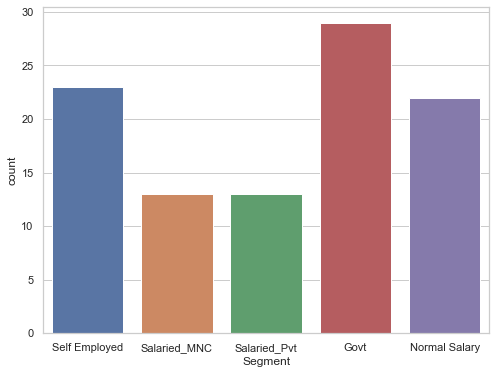

In [54]:
plt.figure(figsize=(8,6))
sns.countplot('Segment',data=customer)
plt.show()

From this graph , it is observed that the max. number of credit card issued for the Govt Employed & second for the Self Employed.

In [55]:
print("We can see from the countplot that number of distinct categories are", len(customer["Segment"].value_counts()))

We can see from the countplot that number of distinct categories are 5


What is the average monthly spend by customers ?

In [56]:
spend.head(2)

,Customer,Month,Type,Amount
0,A1,12-Jan-04,JEWELLERY,485470.80
1,A1,3-Jan-04,PETRO,410556.13


In [57]:
# Converting Month column of "spend" table to date time format

spend['Month'] = pd.to_datetime(spend['Month'])

In [58]:
spend.head(2)

,Customer,Month,Type,Amount
0,A1,2004-01-12,JEWELLERY,485470.80
1,A1,2004-01-03,PETRO,410556.13


Creating new columns which show "Month" and "Year"

In [59]:
spend['Monthly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
spend['Yearly'] = spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [60]:
spend.head()

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


Grouping the dataset based on 'Yearly' and 'monthly'

In [61]:
customer_spend_group= round(spend.groupby(['Yearly','Monthly']).mean(),2)

In [62]:
customer_spend_group

Amount
Yearly Monthly             
2004   April      235272.04
       February   221215.27
       January    251712.07
       March      232146.12
       May        217539.24
       November   270486.40
       September  310923.38
2005   April      252181.33
       August     233734.63
       December   147503.06
       February   229802.28
       January    292741.37
       July       229116.66
       June       262688.11
       May        245696.52
       November   286143.32
       October    194568.64
       September  188666.20
2006   April      232468.97
       August     240699.72
       December   270470.98
       February   253858.26
       January    282058.01
       July       287505.10
       June       177252.39
       March      247166.08
       May        236162.74
       November   182841.29
       October    236136.34
       September  158520.09

What is the average monthly repayment by customers ?

In [63]:
repay.head(2)

,Customer,Month,Amount
0,A1,12-Jan-04,495414.75
1,A1,3-Jan-04,245899.02


In [64]:
# Coverting "Month" column to date time format

repay["Month"] = pd.to_datetime(repay["Month"])

In [65]:
repay.head()

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


Creating new columns which show "Month" and "Year"

In [66]:
repay['Monthly'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%B"))
repay['Yearly'] = repay['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [67]:
# Grouping the dataset based on 'Yearly' and 'monthly'

customer_repay_group= round(repay.groupby(['Yearly','Monthly']).mean(),2)

In [68]:
customer_repay_group

Amount
Yearly Monthly             
2004   April      259141.68
       February   256702.63
       January    243489.65
       March      252585.28
       May        226162.72
       November   209592.24
       September  184487.85
2005   April      212688.63
       August     264430.92
       December   320379.34
       February   238829.27
       January    240548.10
       July       239871.48
       June       210199.82
       May        263207.37
       November   256695.12
       October    219849.96
       September  247700.17
2006   April      275472.25
       August     224143.99
       December   252736.57
       February   284489.57
       January    293475.39
       July       257936.38
       June       251990.45
       March      240851.27
       May        256920.88
       November   199399.20
       October    260765.48
       September  262533.88

In [69]:
spend.head()

,Customer,Month,Type,Amount,Monthly,Yearly
0,A1,2004-01-12,JEWELLERY,485470.80,January,2004
1,A1,2004-01-03,PETRO,410556.13,January,2004
2,A1,2004-01-15,CLOTHES,23740.46,January,2004
3,A1,2004-01-25,FOOD,484342.47,January,2004
4,A1,2005-01-17,CAMERA,369694.07,January,2005


Find all the product , which user has spended its credit card.

# What are the top 5 product types ?

In [70]:
spend['Type'].value_counts()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
SHOPPING        113
BUS TICKET       99
JEWELLERY        95
CLOTHES          95
RENTAL           76
MOVIE TICKET     76
BIKE             49
AUTO             40
CAR              30
SANDALS          28
Name: Type, dtype: int64

Top 5 product types on which customer is spending.

And from this observation we can observed that highest no of credit card spended for purchased on "Pertol"

In [71]:
spend['Type'].value_counts().head()

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

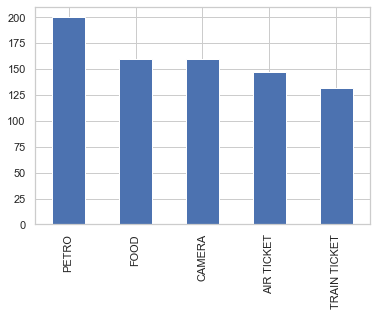

In [72]:
spend['Type'].value_counts().head(5).plot(kind='bar')
plt.show()

# Which city is having maximum no. of Cards ?

In [73]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07


In [74]:
customer_spend['City'].value_counts()

BANGALORE     299
COCHIN        298
CALCUTTA      251
BOMBAY        215
CHENNAI       130
TRIVANDRUM    112
PATNA          98
DELHI          97
Name: City, dtype: int64

In [75]:
customer_spend['City'].value_counts().head()

BANGALORE    299
COCHIN       298
CALCUTTA     251
BOMBAY       215
CHENNAI      130
Name: City, dtype: int64

These are Top 5 Cities

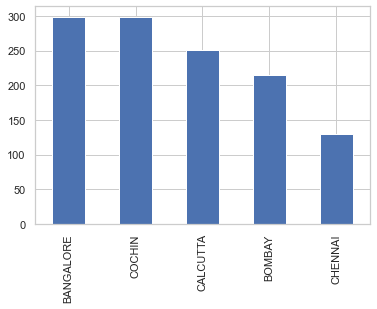

In [76]:
customer_spend['City'].value_counts().head(5).plot(kind='bar')
plt.show()

Bangalore city has highest no of sell for credit card.

C:\Users\meabh\anaconda3\envs\py38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Limit', ylabel='Density'>

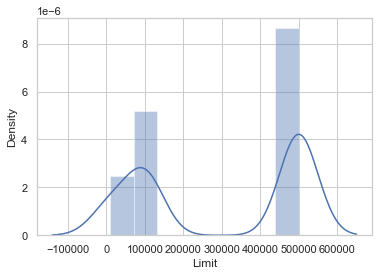

In [77]:
sns.distplot(customer_spend['Limit'])

In [78]:
city_spend = customer_spend.groupby("City")["Amount"].sum().sort_values(ascending=False)

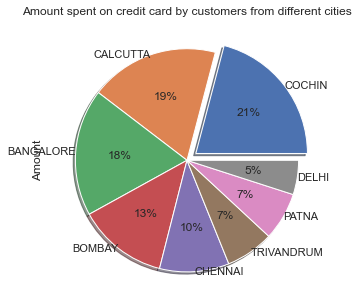

In [79]:
plt.figure(figsize=(5,10))
city_spend.plot(kind="pie",autopct="%1.0f%%",shadow=True,labeldistance=1.0,explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0])
plt.title("Amount spent on credit card by customers from different cities")
plt.show()

In [80]:
print("From above pie chart we can see that Cochin is having maximum spend.")

From above pie chart we can see that Cochin is having maximum spend.


# Which age group is spending more money ?

Creating new column "Age Group" with 8 bins between 18 to 88 

In [81]:
customer_spend["Age Group"] =  pd.cut(customer_spend["Age"],bins=np.arange(18,88,8),labels=["18-26","26-34", "34-42" ,"42-50" ,"50-58","58-66","66-74","74-82"],include_lowest=True)

In [82]:
customer_spend.head()

,Customer,Age,City,Product,Limit,Company,Segment,Month,Type,Amount,Age Group
0,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,12-Jan-04,JEWELLERY,485470.80,74-82
1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3-Jan-04,PETRO,410556.13,74-82
2,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,15-Jan-04,CLOTHES,23740.46,74-82
3,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,25-Jan-04,FOOD,484342.47,74-82
4,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,17-Jan-05,CAMERA,369694.07,74-82


In [83]:
# Grouping data based on "Age Group" and finding the amount spend by each age group and arranging in descending ordered

age_spend = customer_spend.groupby("Age Group")['Amount'].sum().sort_values(ascending=False)

In [84]:
age_spend

Age Group
42-50    53242390.70
34-42    38037826.50
26-34    30553459.81
18-26    25233896.65
50-58    22454066.68
74-82    19770884.32
66-74    17705877.44
58-66    12782683.13
Name: Amount, dtype: float64

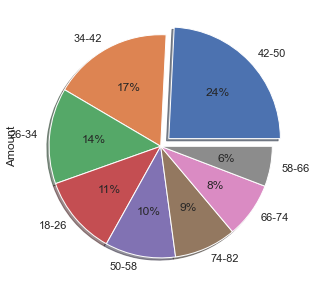

In [85]:
plt.figure(figsize=(5,10))
age_spend.plot(kind = "pie",autopct="%1.0f%%",explode=[0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0],shadow=True)
plt.show()

In [86]:
print("From the pie chart shown above we can say that age group 42 - 50 is spending more money")

From the pie chart shown above we can say that age group 42 - 50 is spending more money


# Who are the top 10 customers in terms of repayment ?

In [87]:
customer_repay.head()

,Customer,Month,Amount,Age,City,Product,Limit,Company,Segment
0,A1,12-Jan-04,495414.75,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,3-Jan-04,245899.02,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,15-Jan-04,259490.06,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,25-Jan-04,437555.12,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,17-Jan-05,165972.88,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [88]:
# Grouping based on "Customer" column to find top 10 customers

customer_repay.groupby("Customer")[["Amount"]].sum().sort_values(by="Amount",ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


In [89]:
customer_repay['Product'].value_counts()

Gold        610
Platimum    570
Silver      320
Name: Product, dtype: int64

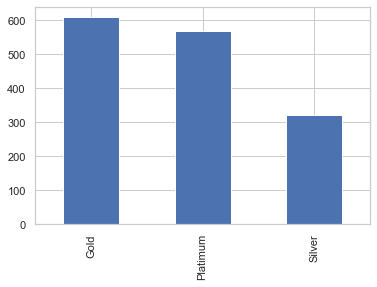

In [90]:
customer_repay['Product'].value_counts().plot(kind='bar')
plt.show()

From this , we can observed "Gold" product membership is the most popular than the others